In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
def error_score(l:np.ndarray, tv:np.ndarray):
    mean = l.mean(axis=0)
    variance = l.std(axis=0)**2
    bias_square = (mean-tv)**2
    return (variance+bias_square).mean()

In [19]:
def load_regression(reps:int):
    return np.load(f'./models/regression(reps={reps}).npy')

In [31]:
tv = np.load('./models/svm_true_regression.npy')
regressions = map(load_regression, range(1, 17))
error_scores = list(map(lambda x: error_score(x, tv), regressions))

In [25]:
import dill
def load_qasvm(reps:int):
    with open(f'./models/qasvm(reps={reps}).pkl', 'rb') as f:
        qasvm = dill.load(f)
    return qasvm

In [26]:
def load_storage(reps:int):
    with open(f'./models/storage(reps={reps}).pkl', 'rb') as f:
        storage = dill.load(f)
    return storage

In [27]:
qasvms = map(load_qasvm, range(1, 17))
storages = map(load_storage, range(1, 17))
num_params = list(map(lambda x: x.num_parameters, qasvms))
num_iters = list(map(lambda x: x.data['Step'].max(), storages))

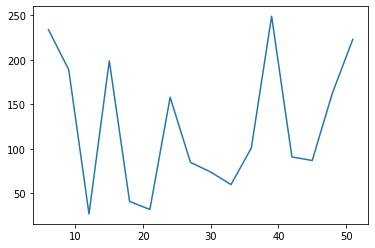

In [30]:
plt.plot(num_params, num_iters)

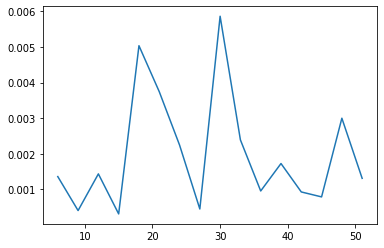

In [35]:
plt.plot(num_params, error_scores)

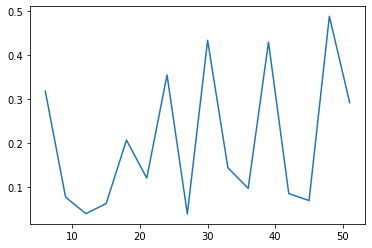

In [36]:
plt.plot(num_params, np.array(num_iters)*np.array(error_scores))

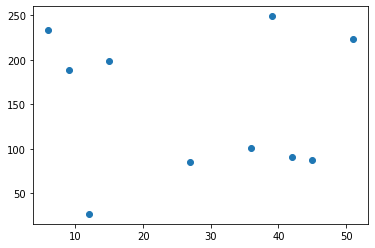

In [48]:
plt.scatter(num_params[error_scores<0.002], num_iters[error_scores<0.002])

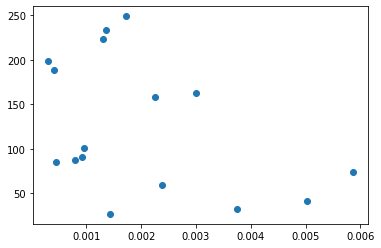

In [50]:
plt.scatter(error_scores, num_iters)

In [3]:
# for SVM
from classifiers.convex.svm import BinarySVM
from classifiers.kernel import Kernel
from classifiers.datasets.dataloader import Example_4x2, Sklearn_DataLoader

In [5]:
np.random.seed(13)
dl = Sklearn_DataLoader('iris', labels=(1,2))
X, y, _, _ = dl(8, true_hot=0)

svm = BinarySVM(Kernel('Pauli', reps=1), C=None, k=10, mutation='REDUCED_QASVM')
svm.fit(X, y)

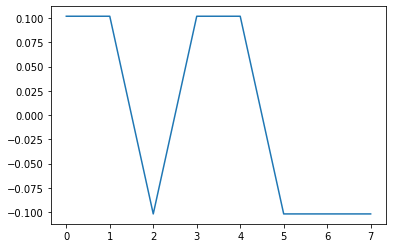

In [6]:
plt.plot(svm.f(X))

In [ ]:
np.save('./models_datanum_8/true_regression.npy', svm.f(X))
svm.save('./models_datanum_8')